# Flight Price Prediction Project

# Problem Statement

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest
available ticket on a given flight gets more and less expensive over time. This usually happens as
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order
to reduce sales and hold back inventory for those expensive last-minute expensive
purchases)
So, you have to work on a project where you collect data of flight fares with other features and
work to make a model to predict fares of flights.

## STEPS
## 1. Data Collection

 I have done the webscraping and collect the data from https://www.yatra.com/. Features of different flight for different location

## 2. Data Analysis

After cleaning the data, you have to do some analysis on the data.
Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend
to go up or down over time?
What is the best time to buy so that the consumer can save the most by taking the least risk?
Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are
morning flights expensive?

# 3. Model Building

After collecting the data, you need to build a machine learning model. Before model building do
all data pre-processing steps. Try different models with different hyper parameters and select
the best model.
Follow the complete life cycle of data science. Include all the steps like
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data set
df=pd.read_csv("Yatra_flight_price.csv")
df

,Unnamed: 0,Airlines,Source,Destination,Departure,Arrival,Duration,Price
0,0,IndiGo,Chennai,Bangalore,07:45,08:40,00:55,"5,518"
1,1,Air Asia,Bangalore,Bangalore,22:35,23:30,00:55,"5,518"
2,2,IndiGo,Chennai,Bangalore,21:35,22:35,01:00,"5,518"
3,3,IndiGo,Bangalore,Bangalore,11:20,12:10,00:50,"5,833"
4,4,IndiGo,Chennai,Bangalore,19:10,19:55,00:45,"6,201"
...,...,...,...,...,...,...,...,...
2695,2695,SpiceJet,Hyderabad,New Delhi,12:10,18:25,06:15,"17,192"
2696,2696,Vistara,Goa,New Delhi,19:10,22:25\n,03:15,"17,386"
2697,2697,SpiceJet,Hyderabad,New Delhi,11:15,17:45,06:30,"17,457"
2698,2698,Air India,Goa,New Delhi,21:05,09:15\n,12:10,"17,598"


Here is our data, there are 2700 rows and 8 columns. It contains both numerical and categorical data. Our target variables is Price, hence it is a continuous variable. So, it is a Regression Problem.

In [3]:
# Drop the column Unnamed:0

df=df.drop(columns='Unnamed: 0',axis=1)

In [4]:
df.head()  # Checking the top 5 rows

,Airlines,Source,Destination,Departure,Arrival,Duration,Price
0,IndiGo,Chennai,Bangalore,07:45,08:40,00:55,"5,518"
1,Air Asia,Bangalore,Bangalore,22:35,23:30,00:55,"5,518"
2,IndiGo,Chennai,Bangalore,21:35,22:35,01:00,"5,518"
3,IndiGo,Bangalore,Bangalore,11:20,12:10,00:50,"5,833"
4,IndiGo,Chennai,Bangalore,19:10,19:55,00:45,"6,201"


In [5]:
df.tail()  # Checking the bottom 5 rows

,Airlines,Source,Destination,Departure,Arrival,Duration,Price
2695,SpiceJet,Hyderabad,New Delhi,12:10,18:25,06:15,"17,192"
2696,Vistara,Goa,New Delhi,19:10,22:25\n,03:15,"17,386"
2697,SpiceJet,Hyderabad,New Delhi,11:15,17:45,06:30,"17,457"
2698,Air India,Goa,New Delhi,21:05,09:15\n,12:10,"17,598"
2699,Air India,Hyderabad,New Delhi,21:05,13:00\n,15:55,"17,598"


In [6]:
# Checking the information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airlines     2700 non-null   object
 1   Source       2700 non-null   object
 2   Destination  2700 non-null   object
 3   Departure    2700 non-null   object
 4   Arrival      2700 non-null   object
 5   Duration     2700 non-null   object
 6   Price        2700 non-null   object
dtypes: object(7)
memory usage: 147.8+ KB


In [7]:
# Checking the Columns Name
df.columns

Index(['Airlines', 'Source', 'Destination', 'Departure', 'Arrival', 'Duration',
       'Price'],
      dtype='object')

In [8]:
# Checking the unique value
df.nunique().to_frame("Number of Unique values")

,Number of Unique values
Airlines,7
Source,6
Destination,6
Departure,240
Arrival,388
Duration,280
Price,1094


In [9]:
# Checking the null value

df.isnull().sum()

Airlines       0
Source         0
Destination    0
Departure      0
Arrival        0
Duration       0
Price          0
dtype: int64

There is no null value present in data.

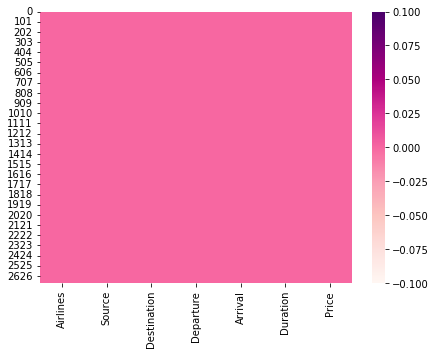

In [10]:
# Visualizing the data in heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull(),cmap='RdPu')
plt.show()

In [11]:
# Checking the count value of data

for i in df.columns:
    print(df[i].value_counts())
    print("*********************************************")

Vistara         989
IndiGo          725
Air India       436
Go First        208
SpiceJet        178
Air Asia        154
Alliance Air     10
Name: Airlines, dtype: int64
*********************************************
Chennai      630
Hyderabad    587
Bangalore    554
Goa          375
Mumbai       282
New Delhi    272
Name: Source, dtype: int64
*********************************************
Mumbai       698
New Delhi    537
Bangalore    464
Hyderabad    409
Goa          327
Chennai      265
Name: Destination, dtype: int64
*********************************************
07:00    94
14:40    63
07:10    49
09:45    46
21:55    44
         ..
22:40     1
20:45     1
04:15     1
23:40     1
21:50     1
Name: Departure, Length: 240, dtype: int64
*********************************************
07:50\n     50
20:55       42
19:15       36
21:20       34
21:15       33
            ..
06:00\n      1
19:20\n      1
07:55        1
09:10        1
06:20        1
Name: Arrival, Length: 388, dtype: int64
***

In [12]:
# Checking the data type
df.dtypes

Airlines       object
Source         object
Destination    object
Departure      object
Arrival        object
Duration       object
Price          object
dtype: object

It is showing all the columns as object. Which is not correct. We will convert departure and arrival into datetime datatype.

In [13]:
# Converting the column to datetime datatype

df["Departure"]=pd.to_datetime(df["Departure"])
df["Arrival"]=pd.to_datetime(df["Arrival"])

In [14]:
df.dtypes

Airlines               object
Source                 object
Destination            object
Departure      datetime64[ns]
Arrival        datetime64[ns]
Duration               object
Price                  object
dtype: object

In [15]:
# Extracting the hour from Departure column
df['Departure_Hour']=pd.to_datetime(df["Departure"]).dt.hour

In [16]:
# Extracting the Minute from Departure column
df['Departure_Minute']=pd.to_datetime(df["Departure"]).dt.minute

In [17]:
# Dropping the Departure column

df=df.drop(columns='Departure',axis=1)

In [18]:
# Extracting the hour from Arrival column
df['Arrival_Hour']=pd.to_datetime(df['Arrival']).dt.hour

# Extracting the minute from Arrival column
df['Arrival_Minute']=pd.to_datetime(df['Arrival']).dt.minute

In [19]:
# Dropping the Arrival column

df=df.drop(columns='Arrival',axis=1)
df.head()

,Airlines,Source,Destination,Duration,Price,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Chennai,Bangalore,00:55,"5,518",7,45,8,40
1,Air Asia,Bangalore,Bangalore,00:55,"5,518",22,35,23,30
2,IndiGo,Chennai,Bangalore,01:00,"5,518",21,35,22,35
3,IndiGo,Bangalore,Bangalore,00:50,"5,833",11,20,12,10
4,IndiGo,Chennai,Bangalore,00:45,"6,201",19,10,19,55


In [20]:
# Extracting the hour From Duration column
df['Duration_Hour']=pd.to_datetime(df["Duration"]).dt.hour

#Extracting the minute from Duration column
df['Duration_Minute']=pd.to_datetime(df["Duration"]).dt.minute

In [21]:
# Dropping the Duration column
df=df.drop(columns='Duration',axis=1)

In [22]:
# Replace the ',' in Price column
df['Price']=df['Price'].str.replace(',','')

In [23]:
df['Price'] = df['Price'].astype('float')

In [24]:
df.head()

,Airlines,Source,Destination,Price,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Chennai,Bangalore,5518.0,7,45,8,40,0,55
1,Air Asia,Bangalore,Bangalore,5518.0,22,35,23,30,0,55
2,IndiGo,Chennai,Bangalore,5518.0,21,35,22,35,1,0
3,IndiGo,Bangalore,Bangalore,5833.0,11,20,12,10,0,50
4,IndiGo,Chennai,Bangalore,6201.0,19,10,19,55,0,45


In [25]:
df.dtypes # Checking the data type after the conversion

Airlines             object
Source               object
Destination          object
Price               float64
Departure_Hour        int64
Departure_Minute      int64
Arrival_Hour          int64
Arrival_Minute        int64
Duration_Hour         int64
Duration_Minute       int64
dtype: object

In [26]:
# Checking the shape of data

df.shape

(2700, 10)

There are 2700 rows and 10 columns

In [27]:
# Checking the space in Price column

df.loc[df['Price']==" "]

,Airlines,Source,Destination,Price,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute


There is no space in target variable. Good to proceed.

In [28]:
# Checking the description of data

df.describe()

,Price,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
count,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000
mean,14074.469259,12.532963,26.177778,14.567407,28.140741,8.057407,27.251852
std,5599.928110,5.675492,17.476016,6.514177,17.567069,6.064801,17.235362
min,5103.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9419.000000,7.000000,10.000000,10.000000,15.000000,2.000000,10.000000
50%,13203.500000,12.000000,25.000000,16.000000,25.000000,7.000000,25.000000
75%,17370.000000,18.000000,40.000000,20.000000,45.000000,12.000000,45.000000
max,43075.000000,23.000000,55.000000,23.000000,55.000000,23.000000,55.000000


In count there 2700 rows, Mean is greater than standard deviation. In the above we see the minimum, maximum, 25th Quartile, 50th Quartile and 75th Quartile value of each features.

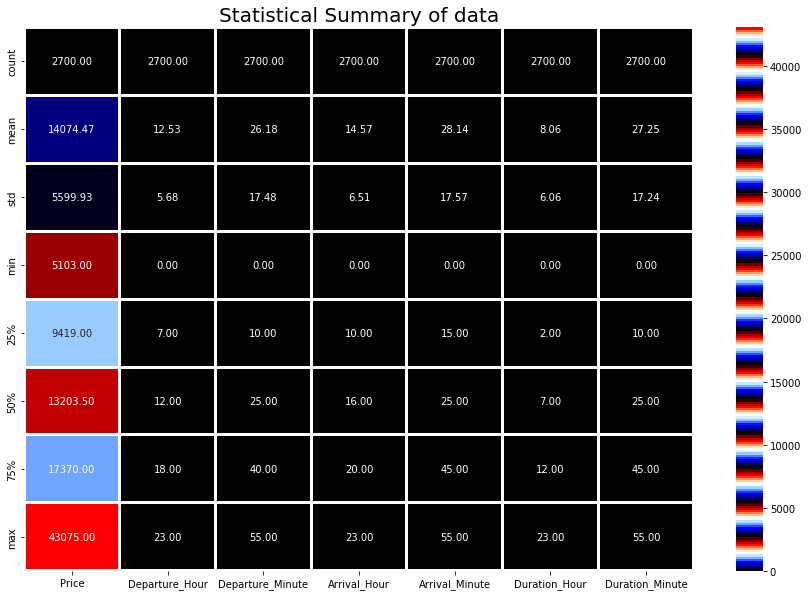

In [29]:
# Viewing the desciption of data in heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.describe(),linewidth=2, annot=True,cmap='flag_r',fmt=".2f")
plt.title("Statistical Summary of data",fontsize=20)
plt.show()

In [30]:
# Separating the categorical data from the dataset

categorical_data=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_data.append(i)
print("Categorical data:\n",categorical_data)

Categorical data:
 ['Airlines', 'Source', 'Destination']


In [31]:
#Separating the numerical data from the dataset

numerical_data=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_data.append(i)
print("Numerical data:\n",numerical_data)

Numerical data:
 ['Price', 'Departure_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hour', 'Duration_Minute']


# Exploratory Data Analysis
# Data Visualization

Vistara         989
IndiGo          725
Air India       436
Go First        208
SpiceJet        178
Air Asia        154
Alliance Air     10
Name: Airlines, dtype: int64


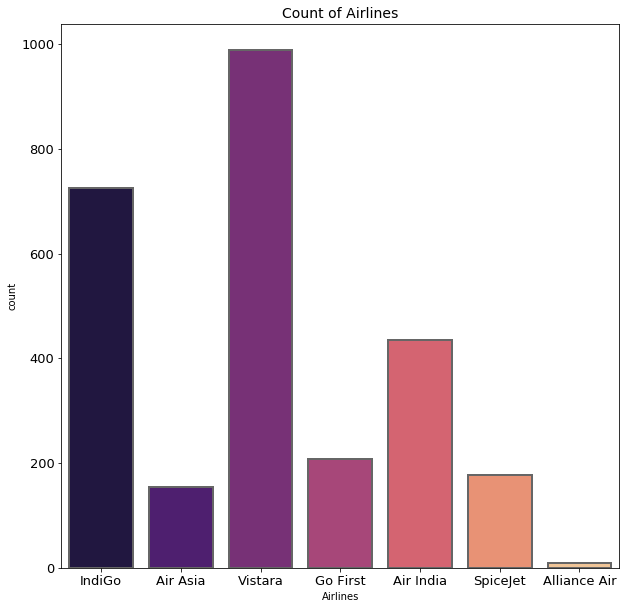

In [32]:
# Checking the count of Airlines
print(df['Airlines'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(df['Airlines'],edgecolor=".4",palette='magma',linewidth=2)
plt.title("Count of Airlines",fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

Majority of people using Vistara Airlines to travel, then comes next Indigo, AirIndia. Least count in the Airlines is Alliance Air.

Chennai      630
Hyderabad    587
Bangalore    554
Goa          375
Mumbai       282
New Delhi    272
Name: Source, dtype: int64


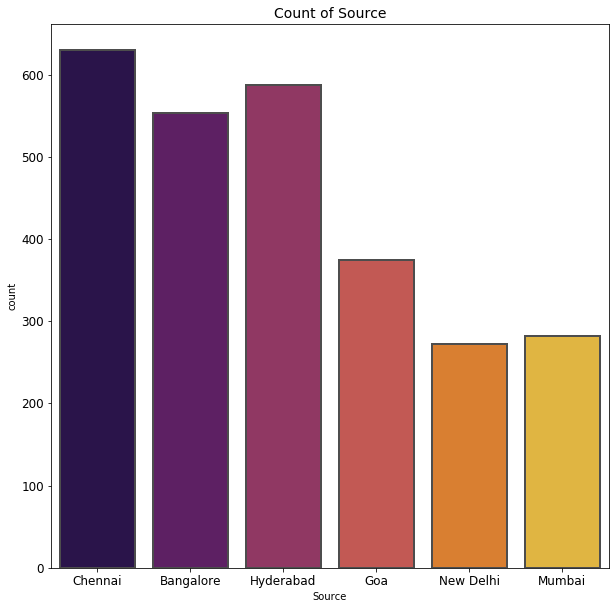

In [33]:
# Checking the counts of Source Location

print(df['Source'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(df['Source'],palette='inferno',linewidth=2,edgecolor=".3")
plt.title("Count of Source",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Majority of count of Source Location is Chennai, Hyderabad, Bangalore. This shows that Majority of people travel from Chennai to the destination location.

Chennai      630
Hyderabad    587
Bangalore    554
Goa          375
Mumbai       282
New Delhi    272
Name: Source, dtype: int64


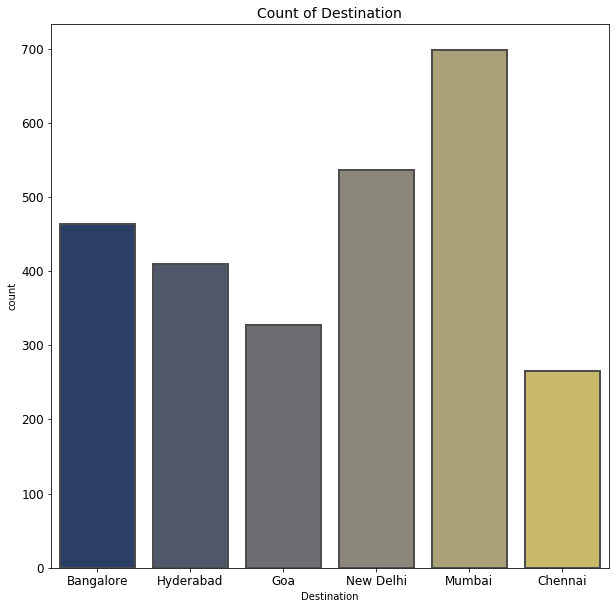

In [34]:
# Checking the counts of Destination Location

print(df['Source'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(df['Destination'],palette='cividis',linewidth=2,edgecolor=".3")
plt.title("Count of Destination",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In Destination the high count is Mumbai and then New Delhi. Majority of people destination is Mumbai. It has the highest count. 

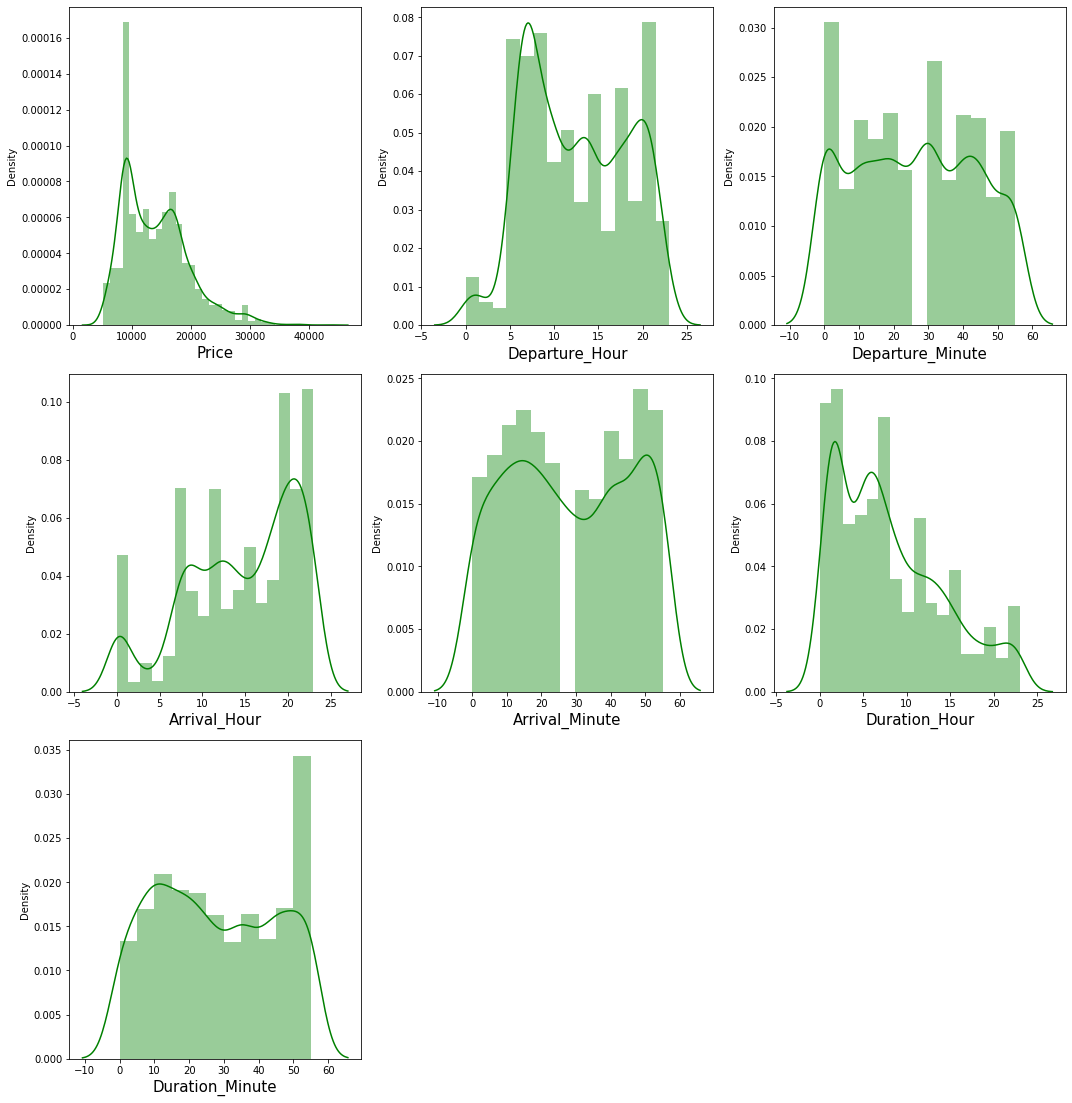

In [41]:
# Checking the skewness in data using the distribution plot

plt.figure(figsize=(15,20),facecolor='white')
plot_number=1
for i in numerical_data:
    if plot_number<=7:
        ax=plt.subplot(4,3,plot_number)
        sns.distplot(df[i],color='green')
        plt.xlabel(i,fontsize=15)
    plot_number+=1
plt.tight_layout()

### Observation

In the above distribution plot we see the skewness of data
Most of the column shows it is distribution normally.
Price, Duration Hour, Duration Minute shows it is right skewed, Mean is greater that median


We need to remove the skewness that are present in data to avoid any data baise.

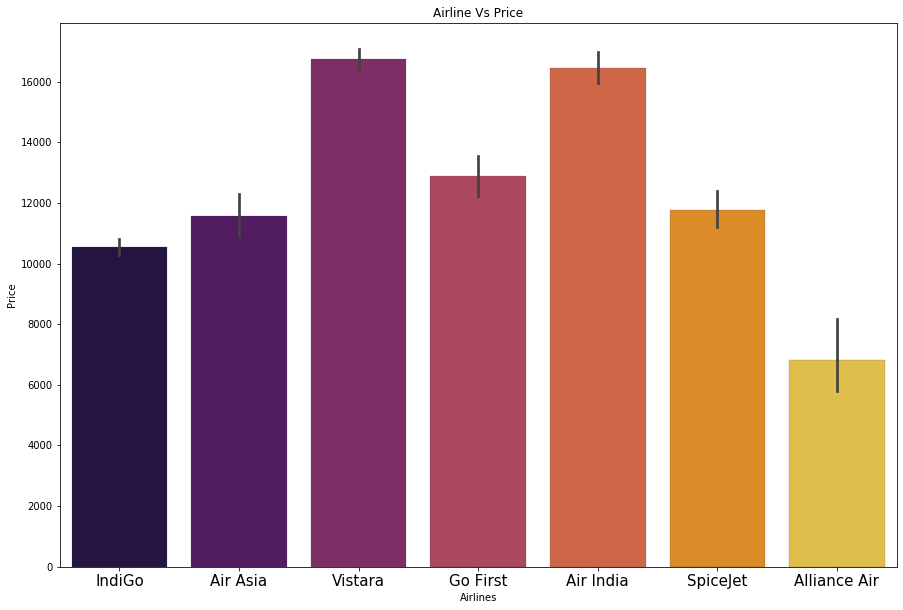

In [45]:
# Comparing the Airlines with Price using the barplot
plt.figure(figsize=(15,10))
sns.barplot(x=df['Airlines'],y=df['Price'],linewidth=.2,palette='inferno',edgecolor='.3')
plt.title("Airline Vs Price")
plt.xticks(fontsize=15)
plt.show()

Air India and Vistara have the highest price ticket than compare to other Airlines.

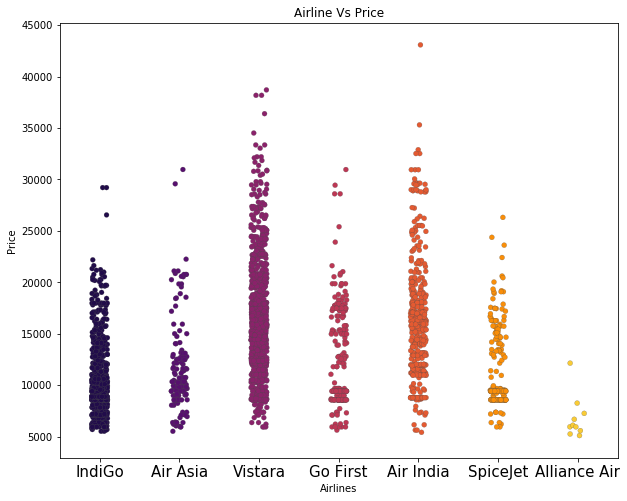

In [47]:
#Comparing the Airlines with Price using the Stripplot
plt.figure(figsize=(10,8))
sns.stripplot(x=df['Airlines'],y=df['Price'],linewidth=.2,palette='inferno',edgecolor='.3')
plt.title("Airline Vs Price")
plt.xticks(fontsize=15)
plt.show()

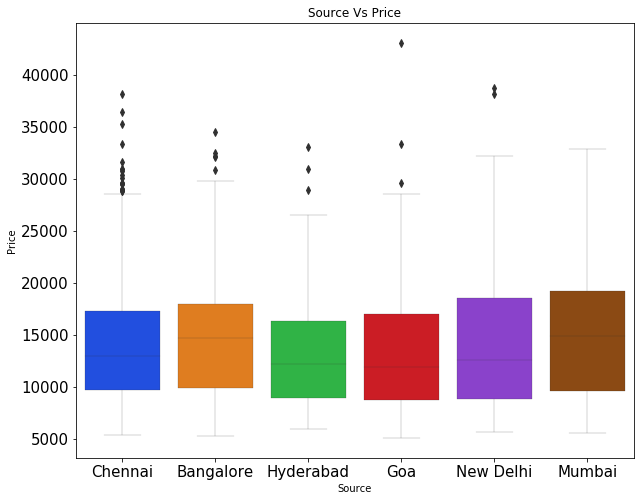

In [55]:
#Checking the outliers in Source using the boxplot
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Source'],y=df['Price'],linewidth=.2,palette='bright')
plt.title("Source Vs Price",fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

We clearly see that in Source Location there is a skewness present.

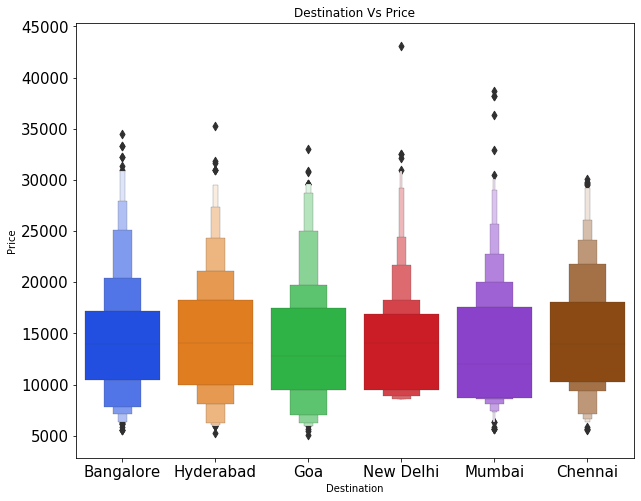

In [60]:
# Comparing the destination with price using the boxenplot.
plt.figure(figsize=(10,8))
sns.boxenplot(x=df['Destination'],y=df['Price'],linewidth=.2,palette='bright')
plt.title("Destination Vs Price",fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In Destination travelling to Goa have higher price when compare to other destination.

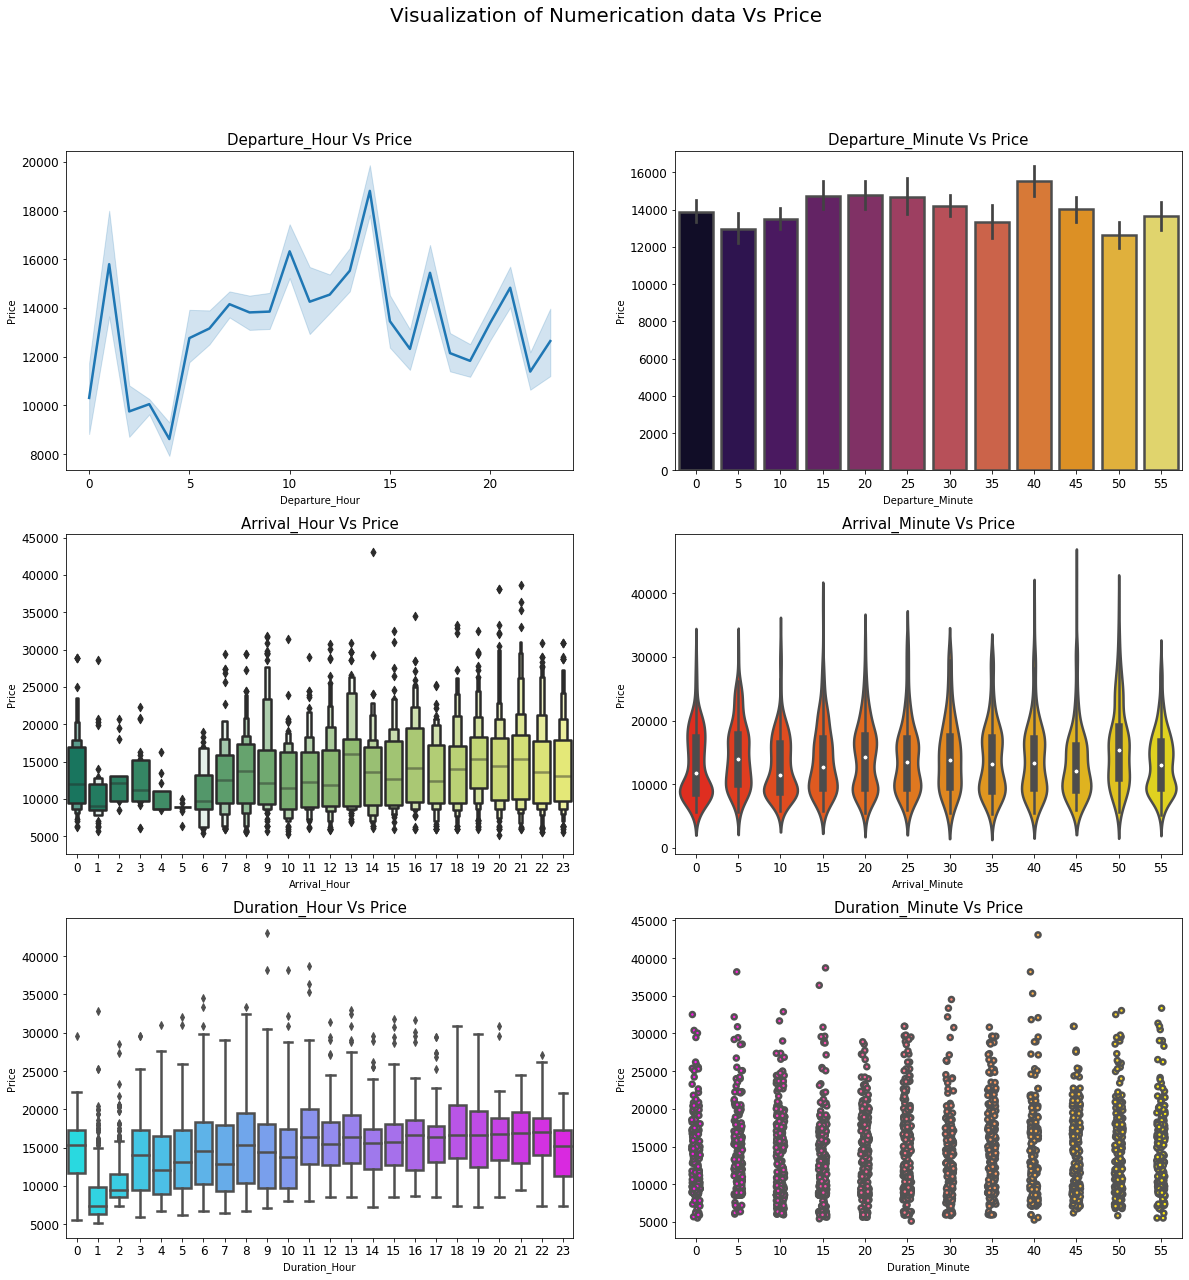

In [84]:
plt.figure(figsize=(20,20))
plt.suptitle("Visualization of Numerication data Vs Price",fontsize=20)
#Departure Hour
plt.subplot(3,2,1)
sns.lineplot(x=df['Departure_Hour'],y=df['Price'],palette='purple',linewidth=2.5)
plt.title("Departure_Hour Vs Price",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Departure Minute
plt.subplot(3,2,2)
sns.barplot(x=df['Departure_Minute'],y=df['Price'],palette='inferno',linewidth=2.5,edgecolor='.3')
plt.title("Departure_Minute Vs Price",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Arrival Hour
plt.subplot(3,2,3)
sns.boxenplot(x=df['Arrival_Hour'],y=df['Price'],palette='summer',linewidth=2.5)
plt.title("Arrival_Hour Vs Price",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Arrival Minute
plt.subplot(3,2,4)
sns.violinplot(x=df['Arrival_Minute'],y=df['Price'],palette='autumn',linewidth=2.5)
plt.title("Arrival_Minute Vs Price",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Duration Hour
plt.subplot(3,2,5)
sns.boxplot(x=df['Duration_Hour'],y=df['Price'],palette='cool',linewidth=2.5)
plt.title("Duration_Hour Vs Price",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Duration Minute
plt.subplot(3,2,6)
sns.stripplot(x=df['Duration_Minute'],y=df['Price'],palette='spring',linewidth=2.5)
plt.title("Duration_Minute Vs Price",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

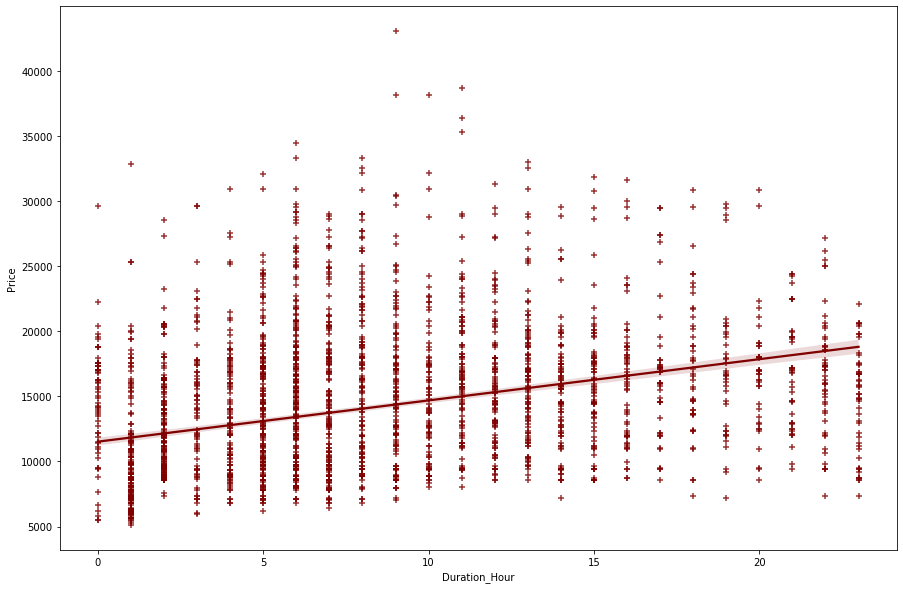

In [93]:
# Viewing the Duration Hour with Price using the regression plot
plt.figure(figsize=(15,10))
sns.regplot(x=df['Duration_Hour'],y=df['Price'],color='maroon',marker='+')
plt.show()

As the Duration Hour increases, so the Flight Price also increasing.

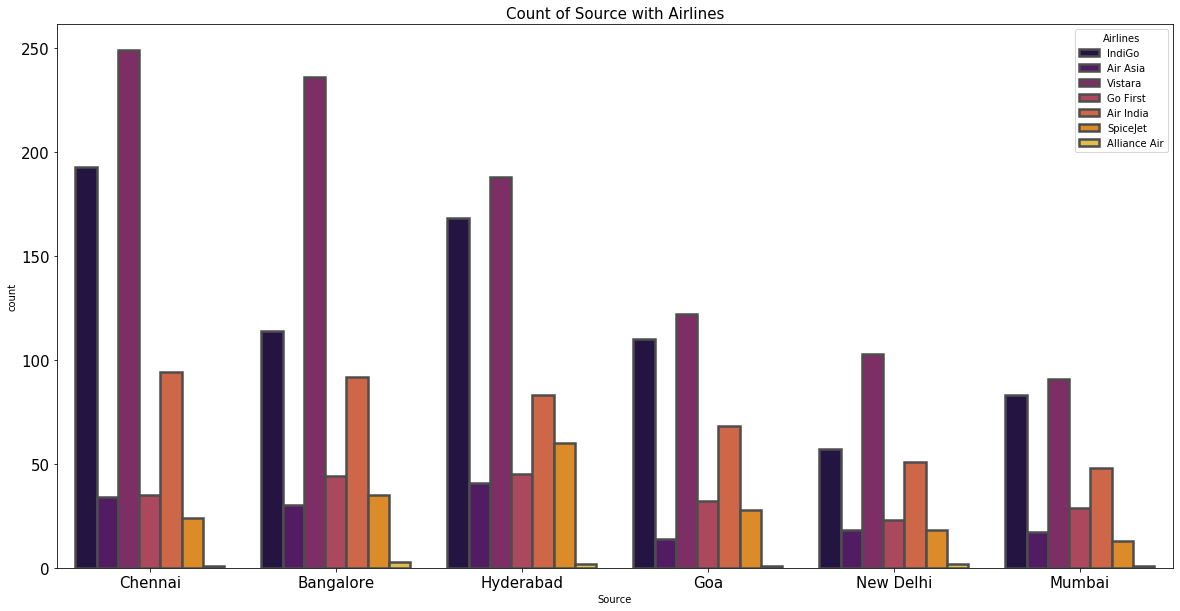

In [102]:
# Checking the count of source with Airlines using the countplot
plt.figure(figsize=(20,10))
sns.countplot(x=df['Source'],hue='Airlines',data=df,palette='inferno',linewidth=2.5,edgecolor='.3')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Count of Source with Airlines",fontsize=15)
plt.show()

Majority of People's source is Chennai and use Vistara Airlines to travel their journey.

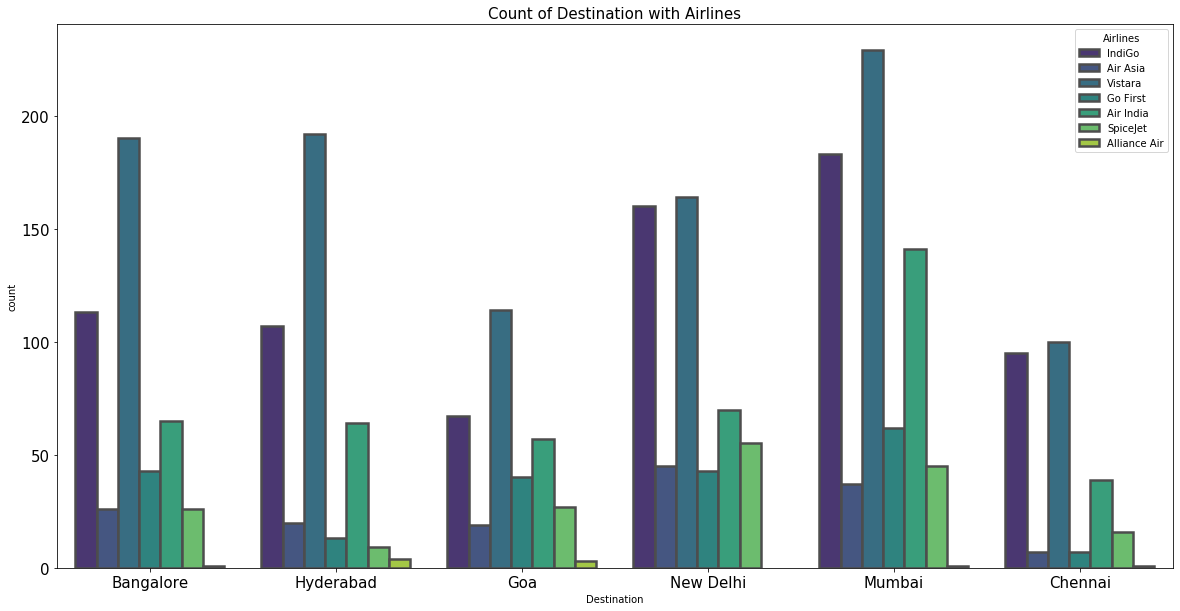

In [103]:
#Checking the count of Destination with Airlines using the countplot
plt.figure(figsize=(20,10))
sns.countplot(x=df['Destination'],hue='Airlines',data=df,palette='viridis',linewidth=2.5,edgecolor='.3')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Count of Destination with Airlines",fontsize=15)
plt.show()

Majority of peopele Destination is Mumbai and use Vistara Airlines to travel.

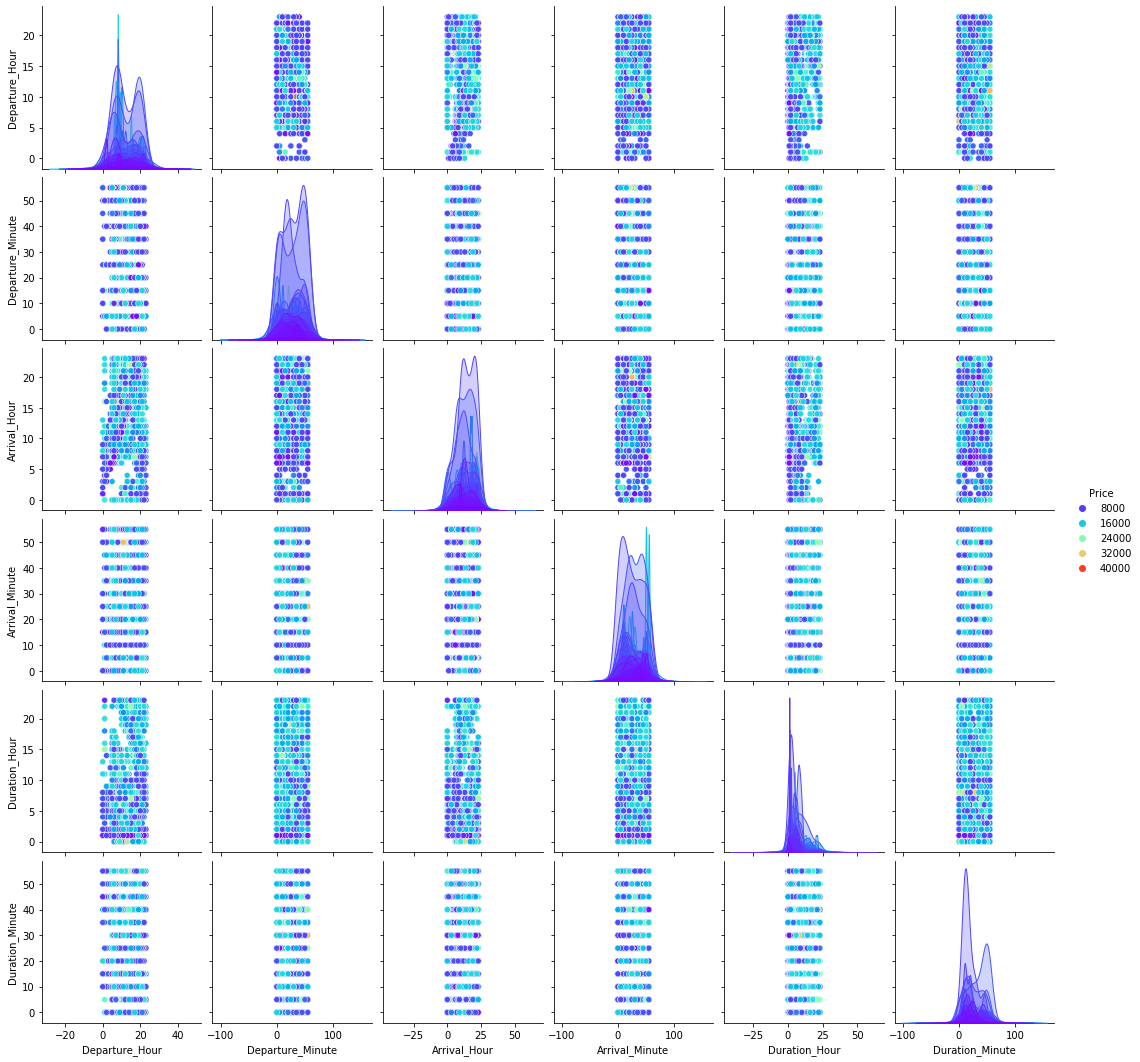

In [114]:
#Viewing the pairplot of data with Price
sns.pairplot(df,hue='Price',palette='rainbow')
plt.show()

We can see from above pairplot of each features with Price.

# Data PreProcessing

# Checking Ouliers

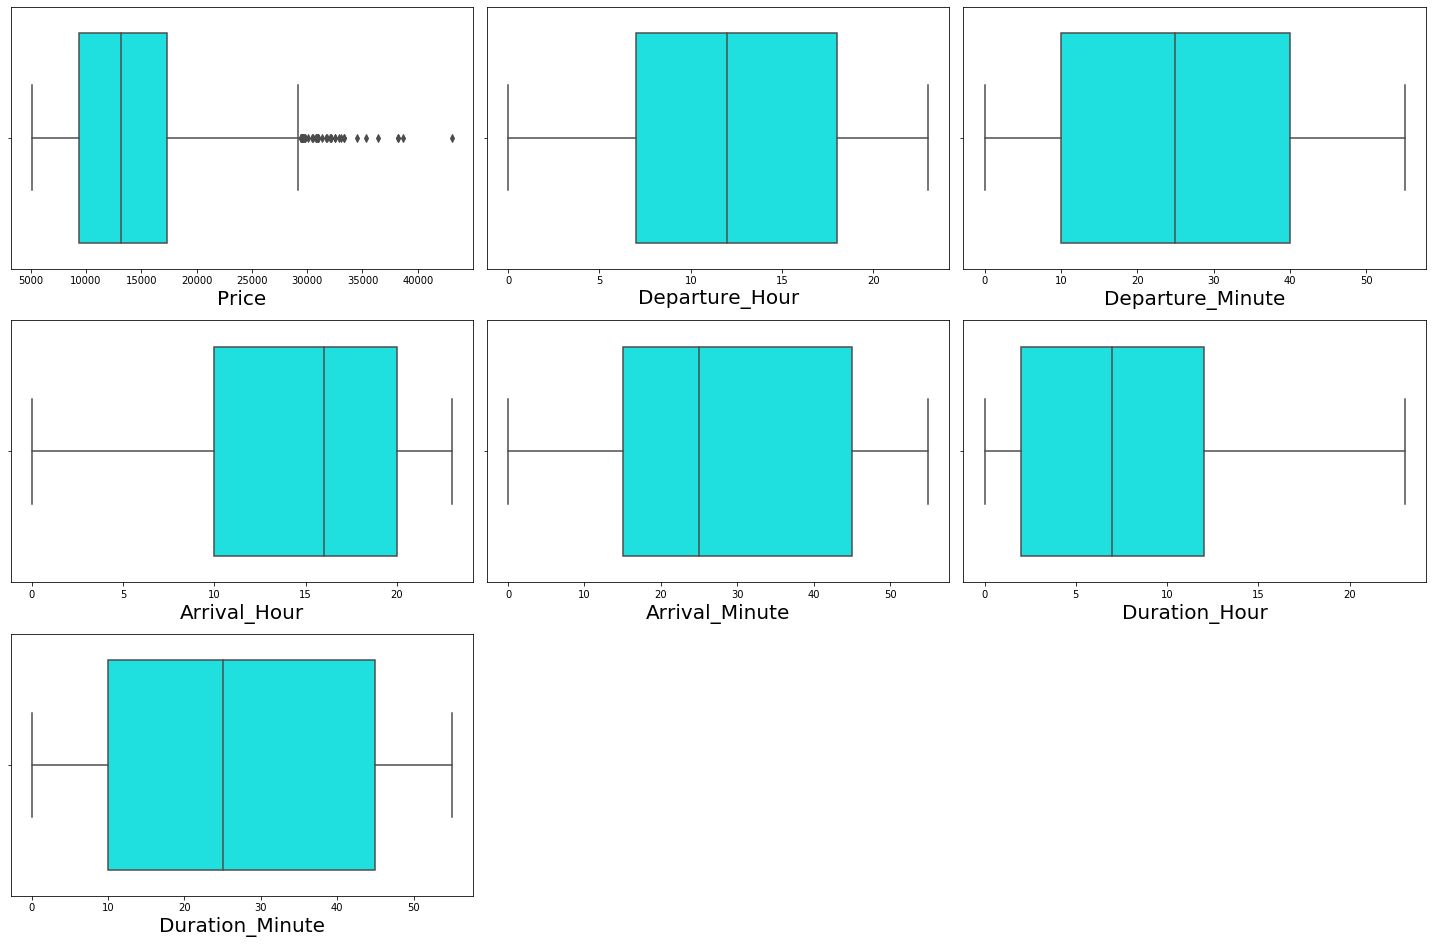

In [119]:
plt.figure(figsize=(20,17))
plot_number=1
for i in numerical_data:
    if plot_number<=7:
        ax=plt.subplot(4,3,plot_number)
        sns.boxplot(df[i],color='aqua')
        plt.xlabel(i,fontsize=20)
    plot_number+=1
plt.tight_layout()

As we see in the above boxplot, outliers present in Price, it is our target variable. So, need to remove Outliers in Price.

# Skewness

In [120]:
df.skew() #Checking the skewness

Price               0.939711
Departure_Hour      0.082547
Departure_Minute    0.040052
Arrival_Hour       -0.582291
Arrival_Minute      0.008271
Duration_Hour       0.734245
Duration_Minute     0.096615
dtype: float64

Skewness is present in Arrival Hour and Duration Hour. Let's remove the skewness.

In [121]:
from sklearn.preprocessing import PowerTransformer

skewed=PowerTransformer(method='yeo-johnson')
skewed

PowerTransformer()

In [122]:
skew=['Arrival_Hour','Duration_Hour']

In [125]:
df[skew]=skewed.fit_transform(df[skew].values)
df[skew]

,Arrival_Hour,Duration_Hour
0,-1.053771,-2.061054
1,1.367041,-2.061054
2,1.192333,-1.483916
3,-0.457245,-2.061054
4,0.677848,-2.061054
...,...,...
2695,0.509771,-0.101848
2696,1.192333,-0.780521
2697,0.343518,-0.101848
2698,-0.908983,0.786622


In [126]:
df.skew() #Checking the skewness after the removal of skewness

Price               0.939711
Departure_Hour      0.082547
Departure_Minute    0.040052
Arrival_Hour       -0.396208
Arrival_Minute      0.008271
Duration_Hour      -0.070725
Duration_Minute     0.096615
dtype: float64

Hence we have removed the skewness present in data. There is no skewness. We are good to proceed further.

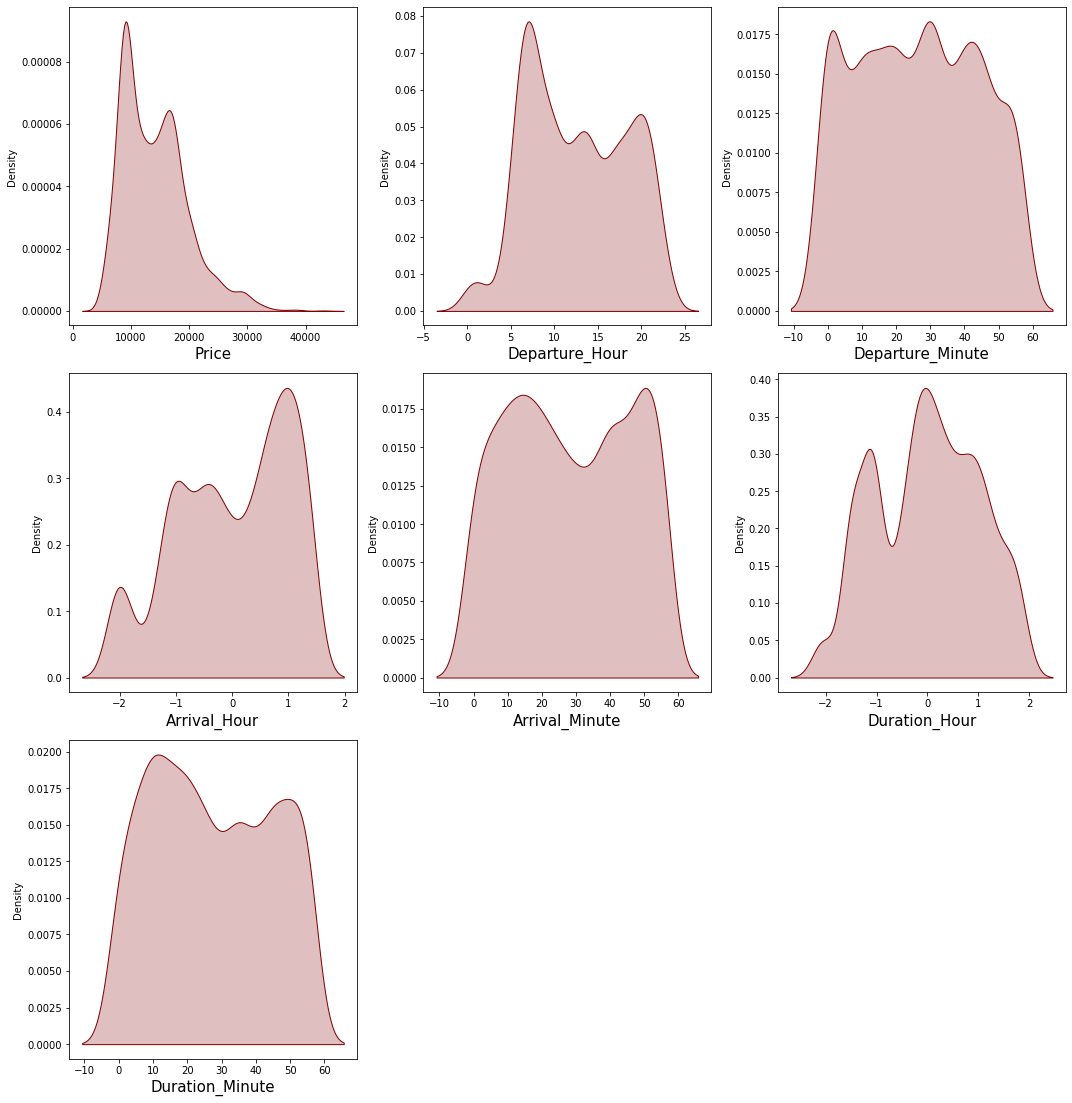

In [131]:
plt.figure(figsize=(15,20),facecolor='white')
plot_number=1
for i in numerical_data:
    if plot_number<=7:
        ax=plt.subplot(4,3,plot_number)
        sns.distplot(df[i],color='maroon',hist=False,kde_kws={'shade':True})
        plt.xlabel(i,fontsize=15)
    plot_number+=1
plt.tight_layout()

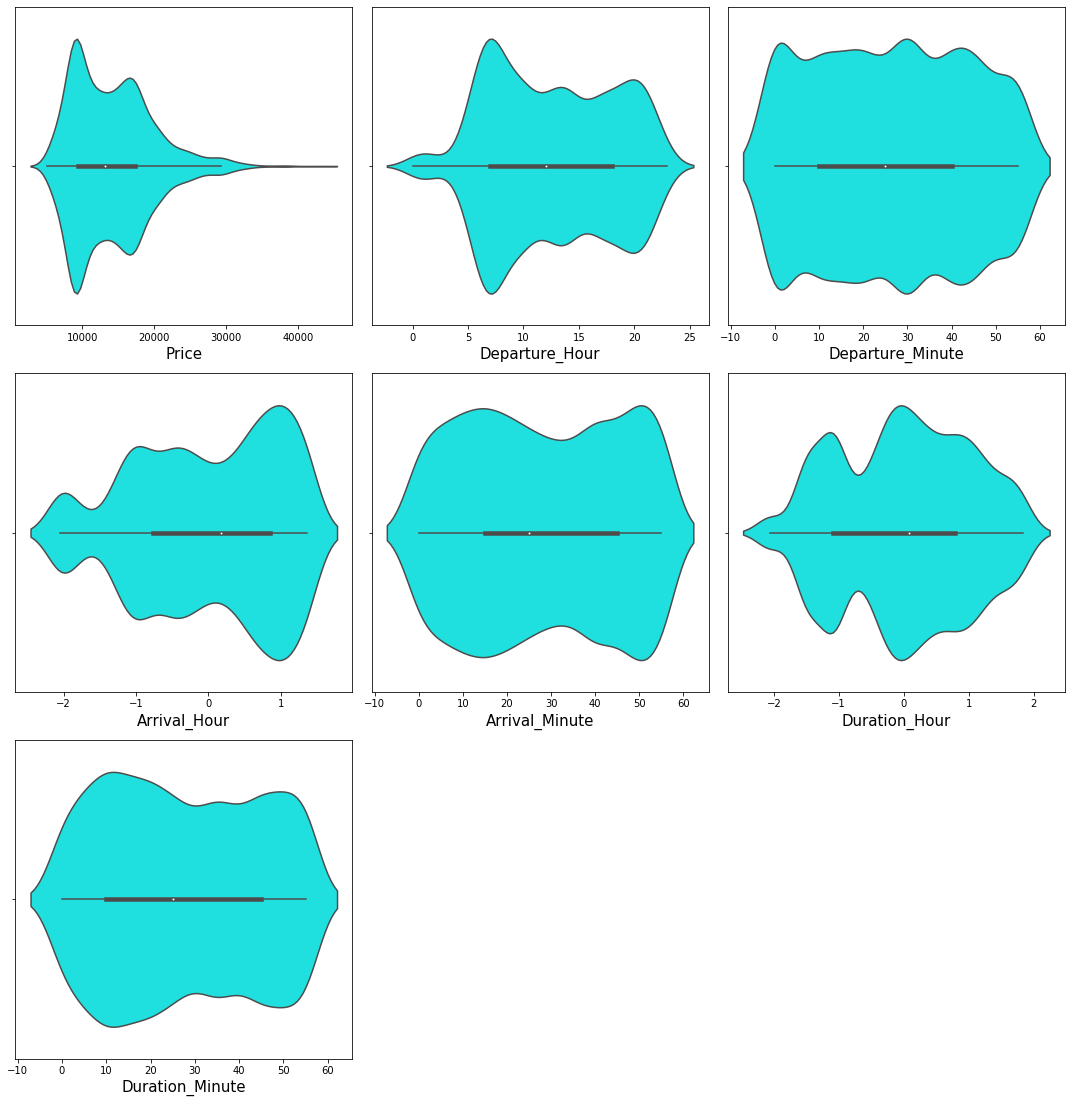

In [137]:
plt.figure(figsize=(15,20),facecolor='white')
plot_number=1
for i in numerical_data:
    if plot_number<=7:
        ax=plt.subplot(4,3,plot_number)
        sns.violinplot(df[i],color='aqua')
        plt.xlabel(i,fontsize=15)
    plot_number+=1
plt.tight_layout()

# Converting Catergorical data to Numerical data using the Label Encoder

In [138]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
LE

LabelEncoder()

In [139]:
df[categorical_data]=df[categorical_data].apply(LE.fit_transform)
df[categorical_data]

,Airlines,Source,Destination
0,4,1,0
1,0,0,0
2,4,1,0
3,4,0,0
4,4,1,0
...,...,...,...
2695,5,3,5
2696,6,2,5
2697,5,3,5
2698,1,2,5


In [140]:
# Viewing the data after the Encoding

df.sample(10)

,Airlines,Source,Destination,Price,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
279,4,3,5,17110.0,17,0,1.367041,30,-0.101848,30
913,4,3,0,7207.0,20,30,1.019193,35,-1.483916,5
813,4,4,1,7102.0,7,45,-0.457245,35,-0.522822,50
2068,6,3,4,12988.0,18,0,0.016816,50,1.675419,50
2511,1,0,2,17073.0,15,25,-2.045933,40,0.390826,15
1590,4,0,1,9419.0,12,55,0.016816,50,-1.089430,55
618,6,1,2,29627.0,17,45,1.019193,20,-0.780521,35
737,4,4,4,13984.0,18,50,1.367041,10,-0.522822,20
855,6,1,1,16973.0,12,55,0.677848,50,-0.101848,55
1686,0,3,0,11571.0,8,10,-0.761157,40,-1.089430,30


In [141]:
# Checking the statistical summary of data
df.describe()

,Airlines,Source,Destination,Price,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
count,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2.700000e+03,2700.000000,2.700000e+03,2700.000000
mean,4.001481,2.084815,2.823333,14074.469259,12.532963,26.177778,3.687380e-16,28.140741,1.825700e-16,27.251852
std,1.997590,1.609252,1.756239,5599.928110,5.675492,17.476016,1.000185e+00,17.567069,1.000185e+00,17.235362
min,0.000000,0.000000,0.000000,5103.000000,0.000000,0.000000,-2.045933e+00,0.000000,-2.061054e+00,0.000000
25%,3.000000,1.000000,1.000000,9419.000000,7.000000,10.000000,-7.611573e-01,15.000000,-1.089430e+00,10.000000
50%,4.000000,2.000000,3.000000,13203.500000,12.000000,25.000000,1.791703e-01,25.000000,7.675109e-02,25.000000
75%,6.000000,3.000000,4.000000,17370.000000,18.000000,40.000000,8.476779e-01,45.000000,7.866217e-01,45.000000
max,6.000000,5.000000,5.000000,43075.000000,23.000000,55.000000,1.367041e+00,55.000000,1.835714e+00,55.000000


# Corrleation

In [142]:
df.corr()

,Airlines,Source,Destination,Price,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
Airlines,1.000000,-0.045566,-0.053153,0.121576,0.012578,0.084644,0.139725,0.099484,0.044400,0.004154
Source,-0.045566,1.000000,0.122635,-0.033896,0.008517,-0.010470,0.003516,-0.033542,-0.015627,0.018492
Destination,-0.053153,0.122635,1.000000,-0.051540,-0.021700,-0.019474,-0.020215,-0.111648,-0.022638,-0.045545
Price,0.121576,-0.033896,-0.051540,1.000000,-0.004804,0.001549,0.144979,0.049598,0.377064,0.062348
Departure_Hour,0.012578,0.008517,-0.021700,-0.004804,1.000000,0.021088,0.052881,0.020329,-0.008040,0.011949
Departure_Minute,0.084644,-0.010470,-0.019474,0.001549,0.021088,1.000000,0.013829,0.017424,-0.005310,0.015270
Arrival_Hour,0.139725,0.003516,-0.020215,0.144979,0.052881,0.013829,1.000000,-0.080376,0.001493,-0.023480
Arrival_Minute,0.099484,-0.033542,-0.111648,0.049598,0.020329,0.017424,-0.080376,1.000000,0.031474,0.051921
Duration_Hour,0.044400,-0.015627,-0.022638,0.377064,-0.008040,-0.005310,0.001493,0.031474,1.000000,0.020495
Duration_Minute,0.004154,0.018492,-0.045545,0.062348,0.011949,0.015270,-0.023480,0.051921,0.020495,1.000000


We can see the correlation of data for Independent and Dependent Variables.

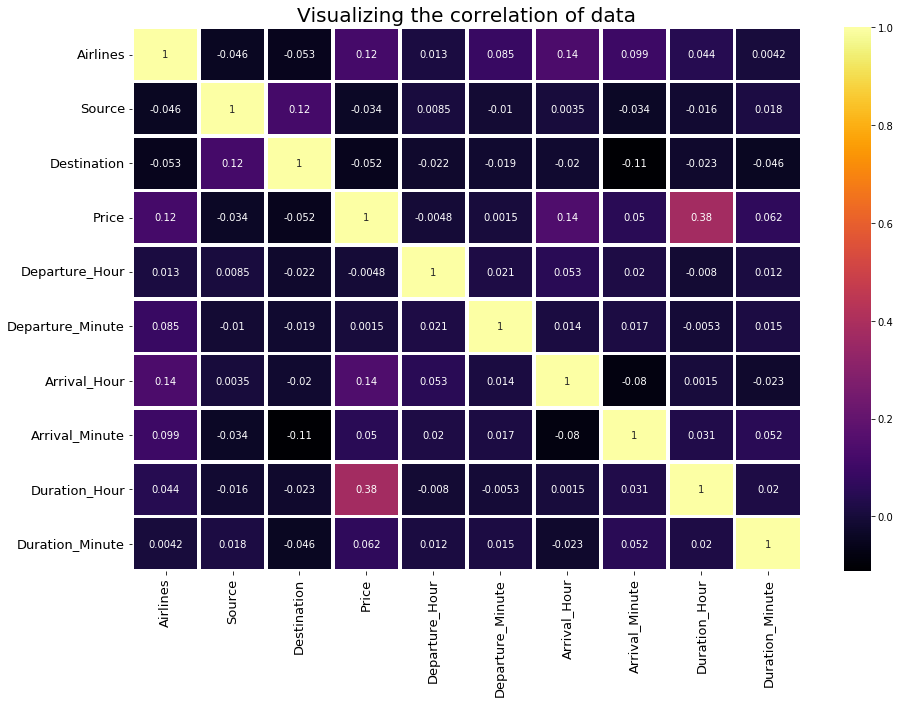

In [148]:
#Viewing the correlation of data using the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=2.5,cmap='inferno')
plt.title("Visualizing the correlation of data",fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

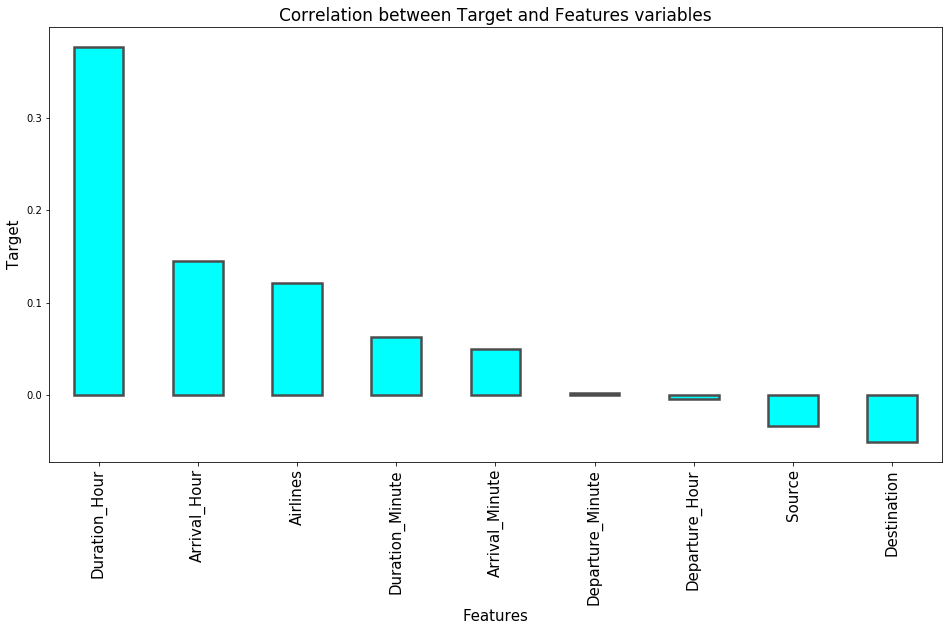

In [155]:
#Viewing the correlation of features and target using the barplot.
plt.figure(figsize=(16,8))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='aqua',linewidth=2.5,edgecolor='.3')
plt.xlabel("Features",fontsize=15)
plt.ylabel("Target",fontsize=15)
plt.title("Correlation between Target and Features variables",fontsize=17)
plt.xticks(fontsize=15)
plt.show()

Departure Minute and Departure Hour is less corrleated as compared to other features. Duration Hour is positive and highly correlated.

# Separating the data into Feature and Label.

In [156]:
x=df.drop('Price',axis=1)
x

,Airlines,Source,Destination,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,4,1,0,7,45,-1.053771,40,-2.061054,55
1,0,0,0,22,35,1.367041,30,-2.061054,55
2,4,1,0,21,35,1.192333,35,-1.483916,0
3,4,0,0,11,20,-0.457245,10,-2.061054,50
4,4,1,0,19,10,0.677848,55,-2.061054,45
...,...,...,...,...,...,...,...,...,...
2695,5,3,5,12,10,0.509771,25,-0.101848,15
2696,6,2,5,19,10,1.192333,25,-0.780521,15
2697,5,3,5,11,15,0.343518,45,-0.101848,30
2698,1,2,5,21,5,-0.908983,15,0.786622,10


In [157]:
y=df['Price']
y

0        5518.0
1        5518.0
2        5518.0
3        5833.0
4        6201.0
         ...   
2695    17192.0
2696    17386.0
2697    17457.0
2698    17598.0
2699    17598.0
Name: Price, Length: 2700, dtype: float64

In [158]:
# Checking the shape

x.shape

(2700, 9)

In [159]:
y.shape

(2700,)

# Standard Scaler

In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Airlines,Source,Destination,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,-0.000742,-0.674236,-1.60790,-0.975067,1.077231,-1.053771,0.675210,-2.061054,1.610253
1,-2.003526,-1.295758,-1.60790,1.668365,0.504912,1.367041,0.105857,-2.061054,1.610253
2,-0.000742,-0.674236,-1.60790,1.492136,0.504912,1.192333,0.390534,-1.483916,-1.581452
3,-0.000742,-1.295758,-1.60790,-0.270152,-0.353566,-0.457245,-1.032847,-2.061054,1.320098
4,-0.000742,-0.674236,-1.60790,1.139678,-0.925885,0.677848,1.529238,-2.061054,1.029943
...,...,...,...,...,...,...,...,...,...
2695,0.499954,0.568808,1.23962,-0.093923,-0.925885,0.509771,-0.178819,-0.101848,-0.710987
2696,1.000650,-0.052714,1.23962,1.139678,-0.925885,1.192333,-0.178819,-0.780521,-0.710987
2697,0.499954,0.568808,1.23962,-0.270152,-0.639725,0.343518,0.959886,-0.101848,0.159478
2698,-1.502830,-0.052714,1.23962,1.492136,-1.212044,-0.908983,-0.748171,0.786622,-1.001142


# Model Building

### Checking the random states

In [167]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best r2 score is ",maxAccu," on Random_state ",maxRS)

Best r2 score is  0.5960681523023429  on Random_state  74


In [201]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)

In [169]:
x_train.shape

(1890, 9)

In [170]:
y_train.shape

(1890,)

In [171]:
x_test.shape

(810, 9)

In [172]:
y_test.shape

(810,)

In [174]:
# Importing Machine Learning Algorithm

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# Linear Regression

In [202]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [203]:
lr_pred=lr.predict(x_test)
print("R2 Score value:",r2_score(y_test,lr_pred)*100)
print("Mean Squared Error:",mean_squared_error(y_test,lr_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,lr_pred))

R2 Score value: 22.05640438726072
Mean Squared Error: 25354750.10310769
Mean Absolute Error: 4021.582367658747


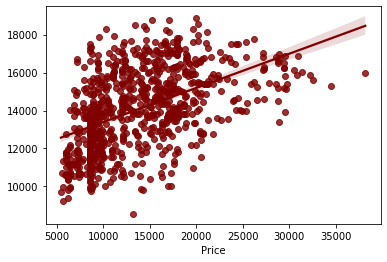

In [204]:
sns.regplot(y_test,lr_pred,color='maroon')
plt.show()

Created the Linear Regression model and done the evaluation metrics. We got the r2_score 22%.

# Decision Tree Regressor

In [205]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [206]:
dtr_pred=dtr.predict(x_test)
print("R2 Score value:",r2_score(y_test,dtr_pred)*100)
print("Mean Squared Error:",mean_squared_error(y_test,dtr_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,dtr_pred))

R2 Score value: 17.722253703556778
Mean Squared Error: 26764632.552469134
Mean Absolute Error: 3210.766666666667


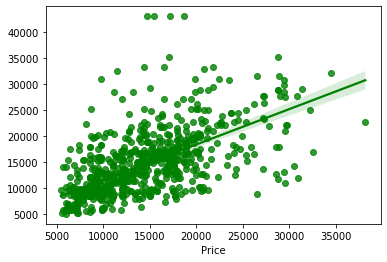

In [212]:
sns.regplot(y_test,dtr_pred,color='green')
plt.show()

Created the Decision Tree Regressor model and done the evaluation metrics. We got the r2_score 17%.

# Random Forest Regressor


In [207]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [208]:
rfr_pred=rfr.predict(x_test)
print("R2 Score value:",r2_score(y_test,rfr_pred)*100)
print("Mean Squared Error:",mean_squared_error(y_test,rfr_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,rfr_pred))

R2 Score value: 58.633159878885024
Mean Squared Error: 13456473.05055367
Mean Absolute Error: 2662.021485679992


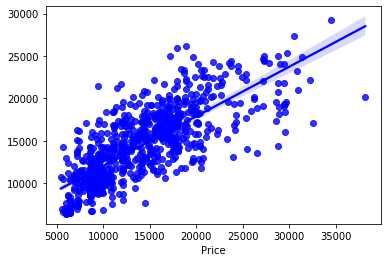

In [214]:
sns.regplot(y_test,rfr_pred,color='blue')
plt.show()

Created the Random Forest Regressor model and done the evaluation metrics. We got the r2_score 59%.

# KNeighbors Regressor

In [215]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [216]:
knn_pred=knn.predict(x_test)
print("R2 Score value:",r2_score(y_test,knn_pred)*100)
print("Mean Squared Error:",mean_squared_error(y_test,knn_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,knn_pred))

R2 Score value: 31.92540430663583
Mean Squared Error: 22144402.61071605
Mean Absolute Error: 3541.1276543209874


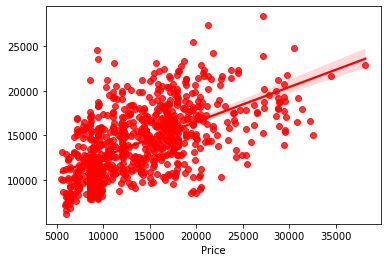

In [218]:
sns.regplot(y_test,knn_pred,color='red')
plt.show()

Created the KNeighbors Regressor model and done the evaluation metrics. We got the r2_score 31%.

# Gradient Boosting Regressor

In [219]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [220]:
gbr_pred=gbr.predict(x_test)
print("R2 Score value:",r2_score(y_test,gbr_pred)*100)
print("Mean Squared Error:",mean_squared_error(y_test,gbr_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,gbr_pred))

R2 Score value: 52.1527086384352
Mean Squared Error: 15564538.767374722
Mean Absolute Error: 3026.977252996523


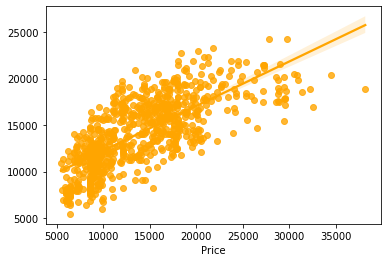

In [227]:
sns.regplot(y_test,gbr_pred,color='Orange')
plt.show()

Created the Gradient Boosting Regressor model and done the evaluation metrics. We got the r2_score 52%.

# Bagging Regressor

In [228]:
br=BaggingRegressor()
br.fit(x_train,y_train)

BaggingRegressor()

In [229]:
br_pred=br.predict(x_test)
print("R2 Score value:",r2_score(y_test,br_pred)*100)
print("Mean Squared Error:",mean_squared_error(y_test,br_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,br_pred))

R2 Score value: 55.550479092816985
Mean Squared Error: 14459257.18392552
Mean Absolute Error: 2734.595012345679


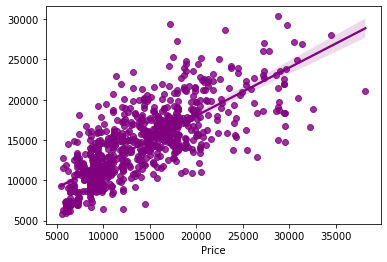

In [230]:
sns.regplot(y_test,br_pred,color='Purple')
plt.show()

Created the Bagging Regressor model and done the evaluation metrics. We got the r2_score 55%.

# Extreme Gradient Boosting Regressor

In [235]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [236]:
xgb_pred=xgb.predict(x_test)
print("R2 Score value:",r2_score(y_test,xgb_pred)*100)
print("Mean Squared Error:",mean_squared_error(y_test,xgb_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,xgb_pred))

R2 Score value: 61.14384099082798
Mean Squared Error: 12639758.198211115
Mean Absolute Error: 2605.1704408998844


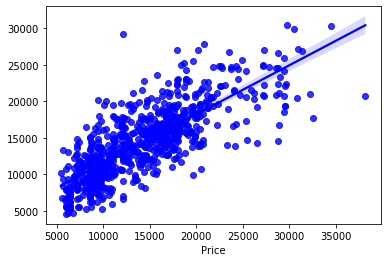

In [241]:
sns.regplot(y_test,xgb_pred,color='blue')
plt.show()

Created the Extream Gradient Boosting Regression model and done the evaluation metrics. We got the r2_score 61%.

After analysis of various model, Extreme Gradient Boosting Regressor gives a good accuracy as compared to other model. Let's do the hyper parameter tuning to check if we can increase the accuracy or not.

# Cross Validation Score

In [250]:
print("Cross Validation of Random Forest Regressor:",cross_val_score(rfr,x,y,cv=10).mean()*(100))
print("Cross Validation of Decision Tree Regressor Regressor:",cross_val_score(dtr,x,y,cv=10).mean()*(-100))
print("Cross Validation of Bagging Regressor Regressor:",cross_val_score(br,x,y,cv=10).mean()*(100))
print("Cross Validation of Ada Boost Regressor:",cross_val_score(ada,x,y,cv=10).mean()*(-100))
print("Cross Validation of Gradient Boosting Regressor:",cross_val_score(gbr,x,y,cv=10).mean()*(100))
print("Cross Validation of Extreame Gradient Boosting Regressor:",cross_val_score(xgb,x,y,cv=10).mean()*(100))
print("Cross Validation of KNeighbors Regressor:",cross_val_score(knn,x,y,cv=10).mean()*(100))

Cross Validation of Random Forest Regressor: 19.452706820537554
Cross Validation of Decision Tree Regressor Regressor: 59.486215631282406
Cross Validation of Bagging Regressor Regressor: 14.529828042161402
Cross Validation of Ada Boost Regressor: 6.658214269774937
Cross Validation of Gradient Boosting Regressor: 25.634240027371103
Cross Validation of Extreame Gradient Boosting Regressor: 20.112093390189784
Cross Validation of KNeighbors Regressor: 0.42711669870750485


# Hyper Parameter Tuning

In [251]:
from sklearn.model_selection import GridSearchCV

In [255]:
params={'n_estimators':[10,50,100],
        'learning_rate':[0.01,0.001,1],
        'max_depth':[1,3,7]
       }

In [256]:
grid=GridSearchCV(XGBRegressor(),params,cv=5)

In [257]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [258]:
grid.best_params_

{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 100}

In [260]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=1, max_delta_step=0,
             max_depth=1, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [274]:
model=XGBRegressor(n_estimators=100,learning_rate=1,max_depth=1)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=1, max_delta_step=0,
             max_depth=1, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [275]:
model_pred=model.predict(x_test)
print("R2 Score value:",r2_score(y_test,model_pred)*100)
print("Mean Squared Error:",mean_squared_error(y_test,model_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,model_pred))

R2 Score value: 46.78779388421034
Mean Squared Error: 17309724.781036306
Mean Absolute Error: 3219.4092785493826


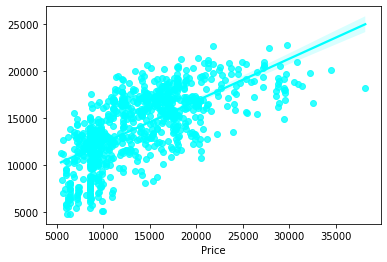

In [277]:
sns.regplot(y_test,model_pred,color='cyan')
plt.show()

# Saving the Model

In [278]:
import pickle

In [279]:
filename="flight_price_prediction.csv"

In [281]:
pickle.dump(xgb,open(filename,'wb'))

In [282]:
loaded_model=pickle.load(open(filename,'rb'))

In [284]:
loaded_model_pred=loaded_model.predict(x_test)
print("Predicted value:\n\n",loaded_model_pred)

Predicted value:

 [ 8400.074  12388.062  15853.257   7003.883  13520.71    5444.5234
  8631.341   7970.101  15343.113  15335.866  11170.806  12734.745
 19179.75   19392.75   20606.293  15672.712   8426.901  15343.409
 11166.536  21767.744  14904.775  10919.194  16259.258  19464.31
 11657.58   15696.966  16070.927  15331.931  15853.586  11223.501
 14241.218  16461.453   8127.892  14311.131  24791.928  15513.41
 17701.223  19272.39   17514.334  17550.055  18502.934  17141.414
 20806.1    14556.2295  6277.09    9711.921  13899.9     8040.272
 10133.468  16109.022  15994.548  13704.674  16591.902  11009.456
 16086.073  17249.23   15209.829   8744.781  12995.564  15866.677
 19657.56   10425.507  15621.778  20166.89   13711.99   24869.553
 10542.85   17840.121  15452.474  12282.546  20637.244   8303.95
  8321.092  18770.514  14811.468  12652.497   9704.544  20484.295
  9728.076  12841.697   9583.854  16949.383   8333.768  14110.689
 22599.875  16748.883   9785.28    7163.397   8614.53   140

In [289]:
dfs=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predict","Actual"])
dfs

,0,1,2,3,4,5,6,7,8,9,...,800,801,802,803,804,805,806,807,808,809
Predict,8400.074219,12388.061523,15853.256836,7003.882812,13520.709961,5444.523438,8631.34082,7970.101074,15343.113281,15335.866211,...,12107.012695,12458.5,17918.931641,6248.011719,10992.098633,16854.957031,21512.757812,25235.65625,11722.057617,21578.414062
Actual,5631.000000,8790.000000,15918.000000,12141.000000,17589.000000,6043.000000,7198.00000,8578.000000,12026.000000,14355.000000,...,15007.000000,14032.0,20428.000000,8568.000000,14767.000000,24225.000000,25897.000000,18648.00000,7413.000000,14129.000000


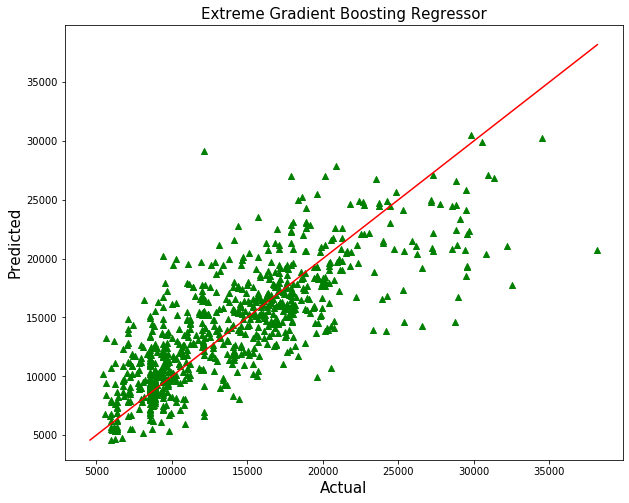

In [291]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,loaded_model_pred,color='green',marker='^')
p1=max(max(loaded_model_pred),max(y_test))
p2=min(min(loaded_model_pred),min(y_test))
plt.plot([p1,p2],[p1,p2],'r-')
plt.xlabel("Actual",fontsize=15)
plt.ylabel("Predicted",fontsize=15)
plt.title("Extreme Gradient Boosting Regressor",fontsize=15)
plt.show()

In [292]:
dfs.to_csv('Flight_Ticket_Price_Prediction.csv') #Saving the Actual and predicted value in csv format

# Conclusion

The main of the flight price case study is to used Machine Learning Algorith and predict the price of Flight based on features available in dataset.
First I have collect the data from yatra.com website using the web scraping tool selenium and fetch all the features and price of flight.
Then I have done the data cleaning, data preprocessing, Data Visualization. Checked the Outliers, Skewness. Removed the skewness using Power Transformer method.
Used various machnine learning algorithm and predict the flight price.

## Data Analysis

## Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time?

Flight Price changes in the morning and evening time. This is obvious most people travel during that time. In the distribution plot we see that flight price increasing ups and down. It don't have constant price. If todays price is something and tomorrow it will totally different price. There is large increase in flight price.

## What is the best time to buy so that the consumer can save the most by taking the least risk?

Early in the morning and mid night travel have less flight Price.

## Does price increase as we get near to departure date?

In the categorical plot we see the price is very high when we are close to the departure date. Last minute booking will make people to pay high flight price.

## Is Indigo cheaper than Jet Airways?

Both Indigo and SpiceJet airway almost have the same price. But Indigo is little bit cheaper than Spicejet.

## Are morning flights expensive?

Not all flights are expensive in morning. Some flights are expensive in the morning time.